## RSI 봇 백테스팅

Fetching data until 2025-08-24 20:37:34.092285
Fetching data until 2025-07-22 13:00:00
Fetching data until 2025-06-19 17:00:00
Fetching data until 2025-05-17 21:00:00


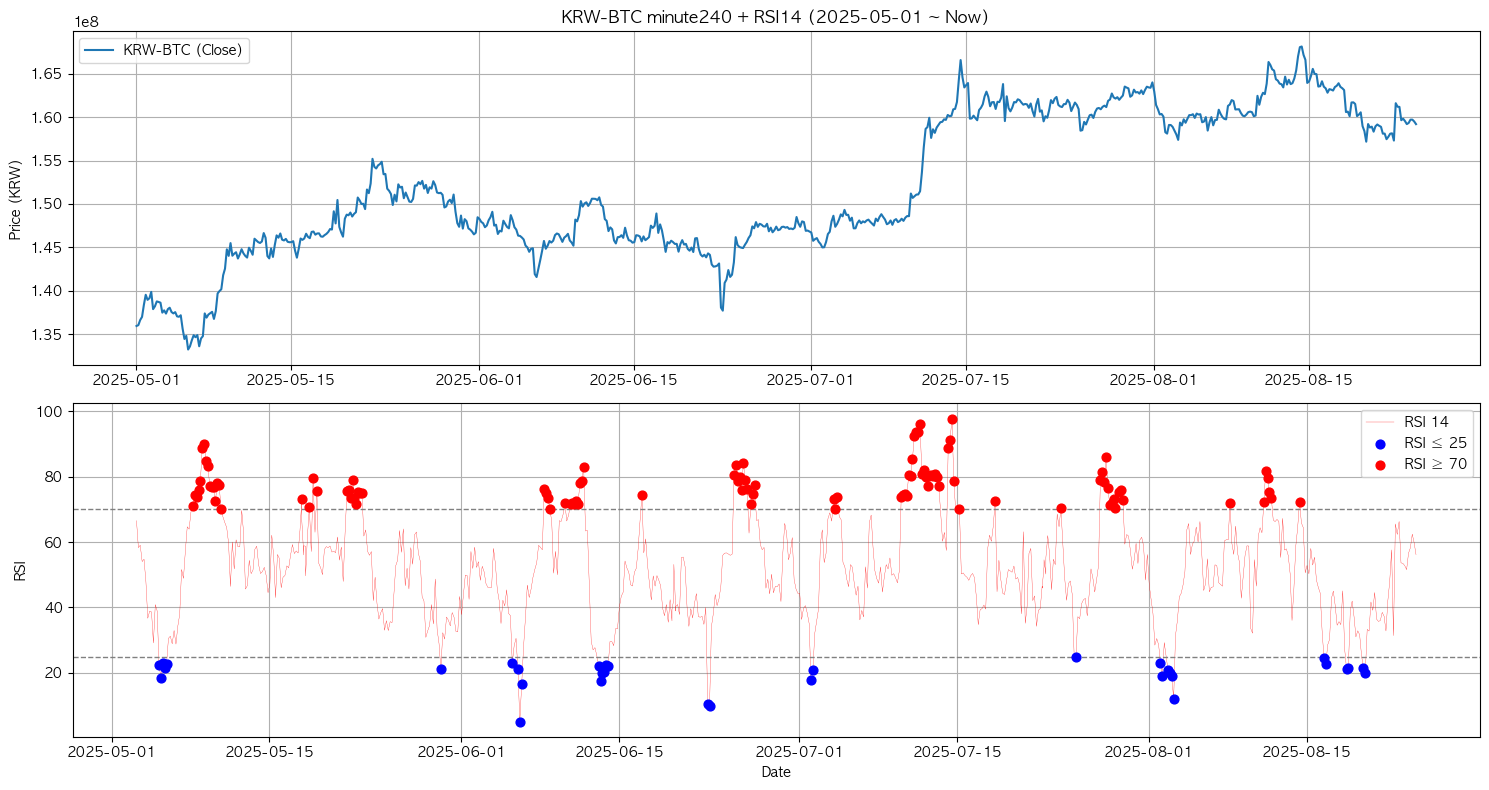

ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x1098a40d0>>)
Traceback (most recent call last):
  File "/Users/kimdonghyeon/2025/개발/python/비트코인강의/.venv/lib/python3.9/site-packages/jupyter_client/session.py", line 95, in json_packer
    return json.dumps(
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 30-31: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/kimdonghyeon/2025/개발/python/비트코인강의/.venv/lib/python3.9/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/kimdonghyeon/2025/개발/python/비트코인강의/.venv/lib/python3.9/site-packages/ipykernel/iostream.py", line 649, in _flush
    self.session.send(
  File "/Users/kimdonghyeon/2025/개발/python/비트코인강의/.venv/lib/python3.9/site-packages/jupyter_client/

In [ ]:
# import pyupbit
# import pandas as pd
# from datetime import datetime
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import numpy as np
# import time

# mpl.rcParams['font.family'] = 'AppleGothic'
# mpl.rcParams['axes.unicode_minus'] = False

# # ======================
# # 🔹 설정값
# ticker = "KRW-BTC"
# start_date = "2025-05-01"
# interval = "minute240"
# bot_interval = 30
# fee = 0.0005
# initial_capital = 3_000_000
# min_trade = 5000

# # 🔹 RSI 및 수익률 조건
# rsi_buy_threshold = 25
# rsi_sell_threshold = 70
# min_profit_to_sell = 7  # ✔️ 300% 이상일 때만 매도
# # ======================

# # 1️⃣ OHLCV 데이터 수집
# all_data = []
# to = datetime.now()

# while True:
#     data = pyupbit.get_ohlcv(ticker, interval=interval, to=to, count=200)
#     print(f"Fetching data until {to}")
#     if data is None or data.empty:
#         break
#     all_data.append(data)
#     to = data.index[0]
#     if to < pd.to_datetime(start_date):
#         break
#     time.sleep(0.3)

# df = pd.concat(all_data)
# df = df[df.index >= pd.to_datetime(start_date)]
# df.sort_index(inplace=True)

# # 2️⃣ RSI 계산
# delta = df["close"].diff()
# gain = np.where(delta > 0, delta, 0)
# loss = np.where(delta < 0, -delta, 0)

# roll_up = pd.Series(gain).rolling(window=14).mean()
# roll_down = pd.Series(loss).rolling(window=14).mean()

# RS = roll_up / roll_down
# RSI = 100.0 - (100.0 / (1.0 + RS))
# df["RSI14"] = RSI.values

# # 3️⃣ RSI 시각화
# plt.figure(figsize=(15,8))
# plt.subplot(2,1,1)
# plt.plot(df.index, df["close"], label=f"{ticker} (Close)")
# plt.title(f"{ticker} {interval} + RSI14 ({start_date} ~ Now)")
# plt.ylabel("Price (KRW)")
# plt.legend()
# plt.grid(True)

# plt.subplot(2,1,2)
# plt.plot(df.index, df["RSI14"], color="red", label="RSI 14", linewidth=0.2)
# plt.axhline(rsi_sell_threshold, color="gray", linestyle="--", linewidth=1)
# plt.axhline(rsi_buy_threshold, color="gray", linestyle="--", linewidth=1)

# oversold = df[df["RSI14"] <= rsi_buy_threshold]
# overbought = df[df["RSI14"] >= rsi_sell_threshold]

# plt.scatter(oversold.index, oversold["RSI14"], color="blue", s=40, zorder=5, label=f"RSI ≤ {rsi_buy_threshold}")
# plt.scatter(overbought.index, overbought["RSI14"], color="red", s=40, zorder=5, label=f"RSI ≥ {rsi_sell_threshold}")

# plt.ylabel("RSI")
# plt.xlabel("Date")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # ✅ 상태 출력
# print("\n📌 [RSI 실시간 확인]")
# print(f" - 최신 캔들 시작 시간: {df.index[-1]}")
# print(f" - 현재 RSI14 값: {df['RSI14'].iloc[-1]:.2f}")
# print(f" - 참고용 이전 RSI 값: {df['RSI14'].iloc[-2]:.2f}")

# print("\n" + "="*50)
# print("📌 [시뮬레이션 전략 요약]")
# print(f"- 매수 조건:")
# print(f"   └ RSI ≤ {rsi_buy_threshold} ➜ 현금의 20% 분할 매수 (단, {min_trade:,}원 이상일 때만)")
# print(f"- 매도 조건:")
# print(f"   └ RSI ≥ {rsi_sell_threshold} AND 수익률 ≥ {min_profit_to_sell}% ➜ 보유량의 절반 익절")
# print(f"   └ 그 외 ➜ 보유 유지 (매도하지 않음)")
# print("="*50)

# # ======================
# # 4️⃣ 매매 시뮬레이션
# capital = initial_capital
# position = 0
# avg_buy_price = 0

# for i in range(1, len(df)):
#     prev_rsi = df["RSI14"].iloc[i - 1]
#     rsi = df["RSI14"].iloc[i]
#     price = df["close"].iloc[i]

#     # ✅ [매수 조건]
#     if prev_rsi <= rsi_buy_threshold and rsi > rsi_buy_threshold and capital > 0:
#         invest_amount = capital * 0.2
#         if invest_amount < min_trade:
#             continue
#         btc_amount = (invest_amount * (1 - fee)) / price
#         total_cost = (avg_buy_price * position) + invest_amount
#         position += btc_amount
#         avg_buy_price = total_cost / position
#         capital -= invest_amount
#         print(f"{df.index[i]} 매수: {price:.0f}원 | 매수 금액: {invest_amount:.0f}원 | 평균 단가: {avg_buy_price:.0f}원 | 잔여 현금: {capital:.0f}원")

#     # ✅ [매도 조건]
#     if rsi >= rsi_sell_threshold and position > 0 and avg_buy_price > 0:
#         profit_rate = (price - avg_buy_price) / avg_buy_price * 100

#         if profit_rate >= min_profit_to_sell:
#             hold_value = position * price
#             if hold_value < min_trade:
#                 continue

#             sell_amount = position / 2
#             sell_value = (sell_amount * price) * (1 - fee)
#             if sell_value < min_trade:
#                 continue
#             capital += sell_value
#             position -= sell_amount
#             print(f"{df.index[i]} ✅ 절반 매도(익절): {price:.0f}원 | 매도 금액: {sell_value:,.0f}원 | 남은 보유량: {position:.6f} | 수익률: {profit_rate:.2f}%")

# # 5️⃣ 정산 출력
# final_price = df["close"].iloc[-1]
# btc_value = position * final_price
# final_value = capital + btc_value
# total_profit_rate = (final_value - initial_capital) / initial_capital * 100

# print("="*50)
# print("📦 최종 자산 내역")
# print(f" - 보유 현금: {capital:,.0f} 원")
# print(f" - 보유 BTC 수량: {position:.6f} BTC")
# print(f" - BTC 평가 금액: {btc_value:,.0f} 원 (가격: {final_price:,.0f} 원)")
# print("-" * 50)
# print(f"💰 총 평가 금액: {final_value:,.0f} 원")
# print(f"📈 총 수익률: {total_profit_rate:.2f}%")
# print("="*50)





Fetching data until 2025-08-26 00:13:28.769697


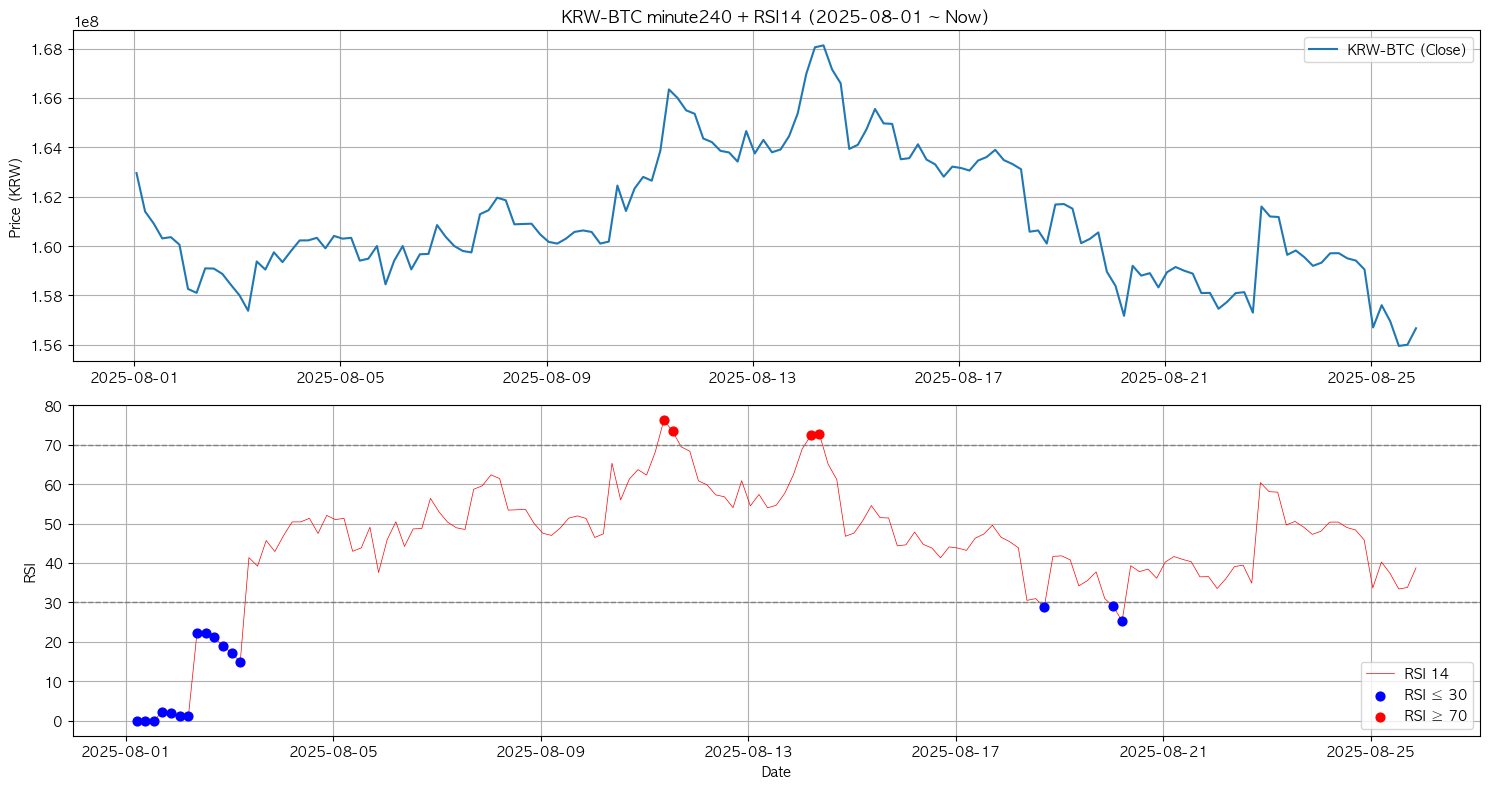


[RSI 실시간 확인]
 - 최신 캐들 시작 시간: 2025-08-25 21:00:00
 - 현재 RSI14 값: 38.76
 - 참고용 이전 RSI 값: 33.77

[시뮬리언 전략 요조]
- 매수 조건:
   └ RSI ≤ 30 ➔ 현금의 20% 분할 매수 (단, 5,000원 이상일 때만)
- 매도 조건:
   └ RSI ≥ 70 AND 수익률 ≥ 7% ➔ 보유량의 절마리 익절
   └ 그 외 ➔ 보유 유지 (매도하지 않음)
- 보트 실행 주기: 30분 간격
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 600000원 | 평균 단가: 159454727원 | 잔여 현금: 2400000원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 480000원 | 평균 단가: 159454727원 | 잔여 현금: 1920000원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 384000원 | 평균 단가: 159454727원 | 잔여 현금: 1536000원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 307200원 | 평균 단가: 159454727원 | 잔여 현금: 1228800원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 245760원 | 평균 단가: 159454727원 | 잔여 현금: 983040원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 196608원 | 평균 단가: 159454727원 | 잔여 현금: 786432원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 157286원 | 평균 단가: 159454727원 | 잔여 현금: 629146원
2025-08-03 09:00:00 매수: 159375000원 | 매수 금액: 125829원 | 평균 단가: 159454727원 | 잔여 현금: 503316원
2025-08-18 21:00:00 매수

In [10]:
import pyupbit
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

# ======================
# 설정값
ticker = "KRW-BTC"
start_date = "2025-08-01"
interval = "minute240"  # 캔들 간격
bot_interval = 30  # 봇 실행 주기 (분 단위)
fee = 0.0005
initial_capital = 3_000_000
min_trade = 5000
period = 14              # RSI 기간

# RSI 및 수익률 조건
rsi_buy_threshold = 30
rsi_sell_threshold = 70
min_profit_to_sell = 7
# ======================

# 1. OHLCV 데이터 수집
to = datetime.now()
all_data = []

while True:
    data = pyupbit.get_ohlcv(ticker, interval=interval, to=to, count=200)
    print(f"Fetching data until {to}")
    if data is None or data.empty:
        break
    all_data.append(data)
    to = data.index[0]
    if to < pd.to_datetime(start_date):
        break
    time.sleep(0.3)

df = pd.concat(all_data)
df = df[df.index >= pd.to_datetime(start_date)]
df = df[~df.index.duplicated(keep='first')]  # 인덱스 중복 제거
df.sort_index(inplace=True)

# 2. RSI 계산
delta = df["close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

roll_up = pd.Series(gain, index=df.index).ewm(alpha=1/period, adjust=False).mean()
roll_down = pd.Series(loss, index=df.index).ewm(alpha=1/period, adjust=False).mean()

RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))
df["RSI14"] = RSI

# 3. RSI 시각화
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(df.index, df["close"], label=f"{ticker} (Close)")
plt.title(f"{ticker} {interval} + RSI14 ({start_date} ~ Now)")
plt.ylabel("Price (KRW)")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(df.index, df["RSI14"], color="red", label="RSI 14", linewidth=0.5)
plt.axhline(rsi_sell_threshold, color="gray", linestyle="--", linewidth=1)
plt.axhline(rsi_buy_threshold, color="gray", linestyle="--", linewidth=1)

oversold = df[df["RSI14"] <= rsi_buy_threshold]
overbought = df[df["RSI14"] >= rsi_sell_threshold]

plt.scatter(oversold.index, oversold["RSI14"], color="blue", s=40, zorder=5, label=f"RSI ≤ {rsi_buy_threshold}")
plt.scatter(overbought.index, overbought["RSI14"], color="red", s=40, zorder=5, label=f"RSI ≥ {rsi_sell_threshold}")

plt.ylabel("RSI")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 상태 출력
print("\n[RSI 실시간 확인]")
print(f" - 최신 캐들 시작 시간: {df.index[-1]}")
print(f" - 현재 RSI14 값: {df['RSI14'].iloc[-1]:.2f}")
print(f" - 참고용 이전 RSI 값: {df['RSI14'].iloc[-2]:.2f}")
# print(f"🗓 분석 기간: {df.index[0].strftime('%Y-%m-%d')} ~ {df.index[-1].strftime('%Y-%m-%d')} ({num_days}일)")

print("\n" + "="*50)
print("[시뮬리언 전략 요조]")
print(f"- 매수 조건:")
print(f"   └ RSI ≤ {rsi_buy_threshold} ➔ 현금의 20% 분할 매수 (단, {min_trade:,}원 이상일 때만)")
print(f"- 매도 조건:")
print(f"   └ RSI ≥ {rsi_sell_threshold} AND 수익률 ≥ {min_profit_to_sell}% ➔ 보유량의 절마리 익절")
print(f"   └ 그 외 ➔ 보유 유지 (매도하지 않음)")
print(f"- 보트 실행 주기: {bot_interval}분 간격")
print("="*50)

# 4. 매매 시뮬리언
capital = initial_capital
position = 0
avg_buy_price = 0
bot_interval_timedelta = timedelta(minutes=bot_interval)

start_time = df.index[0]
end_time = df.index[-1]
bot_times = pd.date_range(start=start_time, end=end_time, freq=f"{bot_interval}min")

timestamps = df.index

executions = 0

for current_time in bot_times:
    idx_arr = timestamps.get_indexer([current_time], method="ffill")
    if idx_arr[0] == -1:
        continue
    idx = idx_arr[0]
    if idx == 0 or idx >= len(df):
        continue

    executions += 1

    prev_rsi = df["RSI14"].iloc[idx - 1]
    rsi = df["RSI14"].iloc[idx]
    price = df["close"].iloc[idx]

    if prev_rsi <= rsi_buy_threshold and rsi > rsi_buy_threshold and capital > 0:
        invest_amount = capital * 0.2
        if invest_amount < min_trade:
            continue
        btc_amount = (invest_amount * (1 - fee)) / price
        total_cost = (avg_buy_price * position) + invest_amount
        position += btc_amount
        avg_buy_price = total_cost / position
        capital -= invest_amount
        print(f"{df.index[idx]} 매수: {price:.0f}원 | 매수 금액: {invest_amount:.0f}원 | 평균 단가: {avg_buy_price:.0f}원 | 잔여 현금: {capital:.0f}원")

    if rsi >= rsi_sell_threshold and position > 0 and avg_buy_price > 0:
        profit_rate = (price - avg_buy_price) / avg_buy_price * 100

        if profit_rate >= min_profit_to_sell:
            hold_value = position * price
            if hold_value < min_trade:
                continue

            sell_amount = position / 2
            sell_value = (sell_amount * price) * (1 - fee)
            if sell_value < min_trade:
                continue
            capital += sell_value
            position -= sell_amount
            print(f"{df.index[idx]} 절마리 매도(익절): {price:.0f}원 | 매도 금액: {sell_value:,.0f}원 | 남은 보유량: {position:.6f} | 수익률: {profit_rate:.2f}%")

# 5. 정산 출력
final_price = df["close"].iloc[-1]
btc_value = position * final_price
final_value = capital + btc_value
total_profit_rate = (final_value - initial_capital) / initial_capital * 100
num_days = (df.index[-1] - df.index[0]).days + 1

print("="*50)
print("[최종 자산 내역]")
print(f" - 보유 현금: {capital:,.0f} 원")
print(f" - 보유 BTC 수량: {position:.6f} BTC")
print(f" - BTC 평가 금액: {btc_value:,.0f} 원 (가격: {final_price:,.0f} 원)")
print("-" * 50)
print(f"💰 총 평가 금액: {final_value:,.0f} 원")
print(f"📈 총 수익률: {total_profit_rate:.2f}%")
print(f"🕒 총 실행 횟수: {executions}회 (보트 인터벌: {bot_interval}분)")
print("="*50)